# PFDA Project

### by E. Qejvani
***

## Part 1 - Preparing the dataset.
***

* Uploading the libraries.
* Keeping the information we are interested in.
* Preparing the dataset for analyzing.
    - Checking data types of the coulumns.
    - Checking for empty value cells or NaN value cells.
    - Cleaning the dataset.

In [34]:
# Importing the libraries.
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
# Importing project_functions file where I'm storing all the functions to use in this project. 
from project_functions import *         

In [35]:
# Uploading the dataset to my data frame, skipping the first 23 rows as the dataset starts at row 24. 
# Setting low_memory=False - easier to upload in big datasets.
df = pd.read_csv('./data/data_valentia.csv', skiprows=23, low_memory=False)

# Creating a subset using only the data I need for this project.
# Two ways of doing it:
df_valentia = df[['date', 'rain', 'temp', 'wetb', 'dewpt', 'rhum', 'vappr', 'msl', 'wdsp', 'wddir']].copy()
# or:
# df_valentia = df.drop(columns=['ww', 'sun', 'w', 'vis', 'clht', 'clamt', 'ind', 'ind.1', 'ind.2', 'ind.3', 'ind.4']) 

df_valentia.head(5)

,date,rain,temp,wetb,dewpt,rhum,vappr,msl,wdsp,wddir
0,01-jan-1944 00:00,0.0,9.3,8.3,7.2,86,10.1,1034.3,12,300
1,01-jan-1944 01:00,0.0,8.9,8.2,7.2,90,10.3,1033.9,9,290
2,01-jan-1944 02:00,0.0,9.4,8.1,6.6,83,9.7,1033.4,11,280
3,01-jan-1944 03:00,0.0,9.3,8.3,7.2,86,10.2,1032.8,11,280
4,01-jan-1944 04:00,0.5,8.6,7.8,7.2,89,9.9,1032.4,11,300


### Checking the dataset.

In [36]:
# Information about our dataset.
df_valentia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709320 entries, 0 to 709319
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    709320 non-null  object
 1   rain    709320 non-null  object
 2   temp    709320 non-null  object
 3   wetb    709320 non-null  object
 4   dewpt   709320 non-null  object
 5   rhum    709320 non-null  object
 6   vappr   709320 non-null  object
 7   msl     709320 non-null  object
 8   wdsp    709320 non-null  object
 9   wddir   709320 non-null  object
dtypes: object(10)
memory usage: 54.1+ MB


### Changing the data types in my dataset.

As we can see from the above all data types in the dataset are object type. To change this I am going to:
- Change the date column type to date type data.
- Change the rest of the columns to float type data. 
- I’m converting the data type of my columns to `float32` to reduce memory usage, as my dataset is quite large.
- I’m creating a function for these changes in the `project_functions.py` file, which will also serve as a repository for all the functions used in my project.
- I am setting the `date` column as the index to make it easier to work with the data based on time, like sorting or grouping by dates.

In [37]:
# Columns_to_convert will pass to `convert_columns_to_float` function all columns that need to change to numeric data.  
columns_to_convert = ['rain', 'temp', 'wetb', 'dewpt', 'rhum', 'vappr', 'msl', 'wdsp', 'wddir']
df_valentia = convert_columns_to_float(df_valentia, columns_to_convert)
df_valentia['date'] = pd.to_datetime(df_valentia['date'], format="%d-%b-%Y %H:%M", errors='coerce')
# Setting the date as index
df_valentia.set_index('date', inplace=True)

In [ ]:
# With the `.info` command I am checking that the changes took effect.
df_valentia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 709320 entries, 1944-01-01 00:00:00 to 2024-12-01 00:00:00
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   rain    709278 non-null  float32
 1   temp    709260 non-null  float32
 2   wetb    709260 non-null  float32
 3   dewpt   709260 non-null  float32
 4   rhum    709260 non-null  float32
 5   vappr   709260 non-null  float32
 6   msl     709260 non-null  float32
 7   wdsp    709275 non-null  float32
 8   wddir   709211 non-null  float32
dtypes: float32(9)
memory usage: 29.8 MB


In [39]:
# Displaying the first three rows to check the structure and columns again in my dataset.
df_valentia.head(3)

,rain,temp,wetb,dewpt,rhum,vappr,msl,wdsp,wddir
date,,,,,,,,,
1944-01-01 00:00:00,0.0,9.3,8.3,7.2,86.0,10.1,1034.300049,12.0,300.0
1944-01-01 01:00:00,0.0,8.9,8.2,7.2,90.0,10.3,1033.900024,9.0,290.0
1944-01-01 02:00:00,0.0,9.4,8.1,6.6,83.0,9.7,1033.400024,11.0,280.0


### Checking if any data is missing - NAN or null values.

In [7]:
# Checking for missing data.
# df_valentia.isnull().sum()
# df_valentia.isna().sum()
# (df_valentia == ' ').sum()

### Checking for single space values `' '`

In Assignment Six of this module, I found out that using `.isna()` and `.isnull()` alone is insufficient for cleaning the dataset. Sometimes, cells can contain an empty value represented by a single space (stored as a string). Therefore, in the next section, I will check for any cells that contain a single space as their value.

### Counting the rows that hold empty cells.

* I created a function in the `project_functions` file that counts all the rows that hold empty cells. 

In [8]:
# calling the funtion from the 'project_functions.py' file.
count_rows_with_empty_or_space_cells_detail(df_valentia)

Rows with 0 empty cells: 709144
Rows with 1 empty cells: 75
Rows with 2 empty cells: 41
Rows with 6 empty cells: 22
Rows with 7 empty cells: 37
Rows with 8 empty cells: 1
Total rows with at least one empty values: 176


176

### Cleaning the rows with empty cells.

* Because of the big size of the dataset (709320 records) I decided to remove all the rows that contain empty cells.
* The total records after removing 176 rows becomes 709144.

In [9]:
df_valentia_clean = remove_rows_with_missing_data(df_valentia)
df_valentia_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 709144 entries, 1944-01-01 00:00:00 to 2024-12-01 00:00:00
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   rain    709144 non-null  float32
 1   temp    709144 non-null  float32
 2   wetb    709144 non-null  float32
 3   dewpt   709144 non-null  float32
 4   rhum    709144 non-null  float32
 5   vappr   709144 non-null  float32
 6   msl     709144 non-null  float32
 7   wdsp    709144 non-null  float32
 8   wddir   709144 non-null  float32
dtypes: float32(9)
memory usage: 29.8 MB


### Converting wind speed to metres per second.

To convert the wind speed (wdsp) from knots to metres per second, I will use the conversion factor of 1 knot = 0.51444 metres/second. In the dataset, wind speed is currently measured in knots, representing the speed of the wind in nautical miles per hour. For my analysis, I need the wind speed expressed in metres per second. To achieve this, I will create a new column in the df_valentia dataset to store the wind speed values converted to metres per second.

In [10]:
# Create a new column with the windspeed in metre/second
df_valentia['wdsp_m/s'] = (df_valentia['wdsp'] * 0.51444).round(2)

In [11]:
df_valentia.head()

,rain,temp,wetb,dewpt,rhum,vappr,msl,wdsp,wddir,wdsp_m/s
date,,,,,,,,,,
1944-01-01 00:00:00,0.0,9.3,8.3,7.2,86.0,10.1,1034.300049,12.0,300.0,6.17
1944-01-01 01:00:00,0.0,8.9,8.2,7.2,90.0,10.3,1033.900024,9.0,290.0,4.63
1944-01-01 02:00:00,0.0,9.4,8.1,6.6,83.0,9.7,1033.400024,11.0,280.0,5.66
1944-01-01 03:00:00,0.0,9.3,8.3,7.2,86.0,10.2,1032.800049,11.0,280.0,5.66
1944-01-01 04:00:00,0.5,8.6,7.8,7.2,89.0,9.9,1032.400024,11.0,300.0,5.66


In [12]:
# I don't need any more the wind speed column in knot so I am removing it from the dataset.
df_valentia = df_valentia.drop(columns=['wdsp'])
df_valentia.head()

,rain,temp,wetb,dewpt,rhum,vappr,msl,wddir,wdsp_m/s
date,,,,,,,,,
1944-01-01 00:00:00,0.0,9.3,8.3,7.2,86.0,10.1,1034.300049,300.0,6.17
1944-01-01 01:00:00,0.0,8.9,8.2,7.2,90.0,10.3,1033.900024,290.0,4.63
1944-01-01 02:00:00,0.0,9.4,8.1,6.6,83.0,9.7,1033.400024,280.0,5.66
1944-01-01 03:00:00,0.0,9.3,8.3,7.2,86.0,10.2,1032.800049,280.0,5.66
1944-01-01 04:00:00,0.5,8.6,7.8,7.2,89.0,9.9,1032.400024,300.0,5.66


In [13]:
df_valentia.info()
df_valentia.columns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 709320 entries, 1944-01-01 00:00:00 to 2024-12-01 00:00:00
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   rain      709278 non-null  float32
 1   temp      709260 non-null  float32
 2   wetb      709260 non-null  float32
 3   dewpt     709260 non-null  float32
 4   rhum      709260 non-null  float32
 5   vappr     709260 non-null  float32
 6   msl       709260 non-null  float32
 7   wddir     709211 non-null  float32
 8   wdsp_m/s  709275 non-null  float32
dtypes: float32(9)
memory usage: 29.8 MB


Index(['rain', 'temp', 'wetb', 'dewpt', 'rhum', 'vappr', 'msl', 'wddir',
       'wdsp_m/s'],
      dtype='object')

### Correlation between wind and other data

In the next part I am checking if there is any correlation between the windspeed and the other data in the dataset.

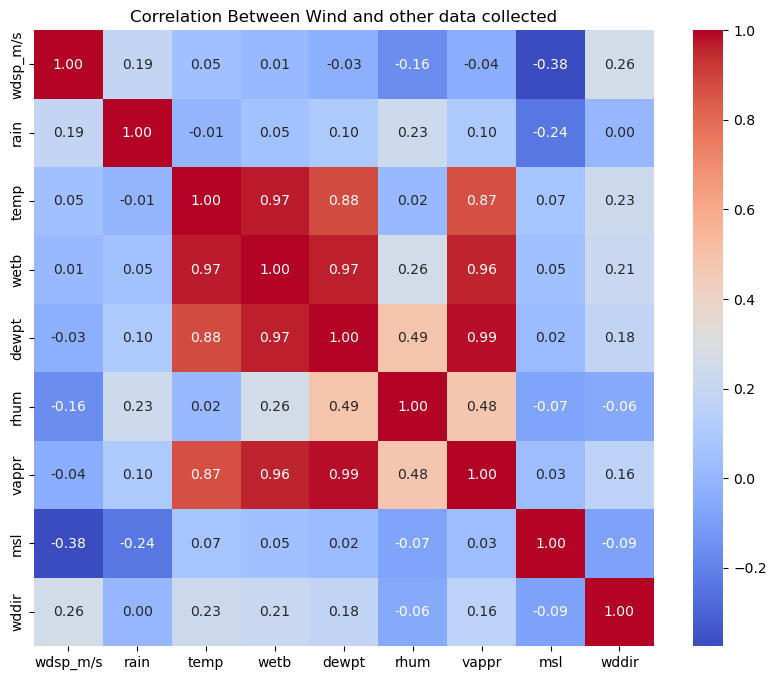

In [14]:
# Selecting columns to for correlation analysis between wind and other information we have.
selected_columns = ['wdsp_m/s','rain', 'temp', 'wetb', 'dewpt', 'rhum', 'vappr', 'msl', 'wddir']
correlation_df = df_valentia[selected_columns]

# Calculating the correlation matrix
correlation_matrix = correlation_df.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Between Wind and other data collected')
plt.show()

As we can see from the above there is no direct connection between the wind speed and the other data we have.
In the next section I will calculate the air density, add it as a new column and remove temp(temperature), vappr(vapor pressure) and msl(mean sea level pressure) columns as they are no longer needed.

In [15]:
# Making changes to the dataset by adding a new column
df_valentia = add_air_density_column(df_valentia)
# Checking if it works
df_valentia.head(5)

,rain,wetb,dewpt,rhum,wddir,wdsp_m/s,air_density
date,,,,,,,
1944-01-01 00:00:00,0.0,8.3,7.2,86.0,300.0,6.17,1.270988
1944-01-01 01:00:00,0.0,8.2,7.2,90.0,290.0,4.63,1.272203
1944-01-01 02:00:00,0.0,8.1,6.6,83.0,280.0,5.66,1.269615
1944-01-01 03:00:00,0.0,8.3,7.2,86.0,280.0,5.66,1.269091
1944-01-01 04:00:00,0.5,7.8,7.2,89.0,300.0,5.66,1.271890


In [ ]:
# Information about the dataset.
df_valentia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 709320 entries, 1944-01-01 00:00:00 to 2024-12-01 00:00:00
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   rain         709278 non-null  float32
 1   wetb         709260 non-null  float32
 2   dewpt        709260 non-null  float32
 3   rhum         709260 non-null  float32
 4   wddir        709211 non-null  float32
 5   wdsp_m/s     709275 non-null  float32
 6   air_density  709260 non-null  float64
dtypes: float32(6), float64(1)
memory usage: 27.1 MB


In [ ]:
# Checking the air density values: range, mean, std etc...
# Get summary statistics for the column
df_valentia['air_density'].describe()

count    709260.000000
mean          1.238767
std           0.023312
min           1.149262
25%           1.222182
50%           1.236412
75%           1.253398
max           1.347003
Name: air_density, dtype: float64

In [18]:
df_valentia['wdsp_m/s'].unique()

array([ 6.17,  4.63,  5.66,  7.2 ,  7.72,  6.69,  3.6 ,  9.77,  8.75,
        9.26,  8.23, 10.29, 10.8 , 11.32, 11.83,  4.12,  2.57,  1.54,
        0.  ,  2.06,  0.51,  3.09,  5.14,  1.03, 13.89, 12.35, 13.38,
       12.86, 14.92, 15.95, 15.43, 14.4 , 16.46, 17.49, 19.55, 19.03,
       21.61, 21.09, 18.01, 16.98, 18.52, 20.06, 22.12, 23.15, 23.66,
       22.64, 26.24, 20.58, 24.69, 25.72, 29.84, 25.21, 24.18, 29.32,
         nan], dtype=float32)

### Calculation how many hours per day the wind speed is between 4m/s(cut-in speed for the turbines to start working) to 25m/s(cut-out speed).

In [19]:
df_working_valentia = df_valentia[(df_valentia['wdsp_m/s'] >= 4) & (df_valentia['wdsp_m/s'] <25)]

df_working_valentia

,rain,wetb,dewpt,rhum,wddir,wdsp_m/s,air_density
date,,,,,,,
1944-01-01 00:00:00,0.0,8.3,7.2,86.0,300.0,6.17,1.270988
1944-01-01 01:00:00,0.0,8.2,7.2,90.0,290.0,4.63,1.272203
1944-01-01 02:00:00,0.0,8.1,6.6,83.0,280.0,5.66,1.269615
1944-01-01 03:00:00,0.0,8.3,7.2,86.0,280.0,5.66,1.269091
1944-01-01 04:00:00,0.5,7.8,7.2,89.0,300.0,5.66,1.271890
...,...,...,...,...,...,...,...
2024-11-30 20:00:00,0.0,12.4,11.7,90.0,190.0,5.66,1.218094
2024-11-30 21:00:00,0.0,12.4,11.7,90.0,190.0,5.66,1.218763
2024-11-30 22:00:00,0.0,12.4,11.8,92.0,190.0,5.66,1.219568


In [20]:
df_working_valentia['wdsp_m/s'].describe()

count    451169.000000
mean          6.997404
std           2.451538
min           4.120000
25%           5.140000
50%           6.690000
75%           8.230000
max          24.690001
Name: wdsp_m/s, dtype: float64

In [21]:
df_working_valentia['air_density'].describe()

count    451137.000000
mean          1.234453
std           0.020981
min           1.149262
25%           1.219471
50%           1.232954
75%           1.248258
max           1.334665
Name: air_density, dtype: float64

In [22]:
# Count the number of occurrences (hours) per day
hours_per_day = group_by_dataset(df_working_valentia, time='D')
hours_per_day

date
1944-01-01    23
1944-01-02    24
1944-01-03    24
1944-01-04     4
1944-01-05    24
              ..
2024-11-27     4
2024-11-28    24
2024-11-29    24
2024-11-30    24
2024-12-01     1
Freq: D, Length: 29556, dtype: int64

In [23]:
hours_per_week = group_by_dataset(df_working_valentia, time='W')
hours_per_week

date
1944-01-02     47
1944-01-09    120
1944-01-16    152
1944-01-23    151
1944-01-30    168
             ... 
2024-11-03     16
2024-11-10    111
2024-11-17     28
2024-11-24    122
2024-12-01     93
Freq: W-SUN, Length: 4223, dtype: int64

In [24]:
hours_per_month = group_by_dataset(df_working_valentia, time='ME')
hours_per_month

date
1944-01-31    658
1944-02-29    522
1944-03-31    421
1944-04-30    494
1944-05-31    478
             ... 
2024-08-31    559
2024-09-30    375
2024-10-31    433
2024-11-30    353
2024-12-31      1
Freq: ME, Length: 972, dtype: int64

In [25]:
hours_per_year = group_by_dataset(df_working_valentia, time='YE')
hours_per_year

date
1944-12-31    6180
1945-12-31    6147
1946-12-31    6275
1947-12-31    6085
1948-12-31    6393
              ... 
2020-12-31    5548
2021-12-31    4723
2022-12-31    5124
2023-12-31    5417
2024-12-31    4762
Freq: YE-DEC, Length: 81, dtype: int64

In [26]:
hours_per_decade = group_by_dataset(df_working_valentia, time='decade')
hours_per_decade

c:\Users\ermel\github\PFDA\project\project_functions.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'decade'] = (df.index.year // 10) * 10


decade
1940    37076
1950    54868
1960    58715
1970    59537
1980    61111
1990    51693
2000    50417
2010    52178
2020    25574
dtype: int64

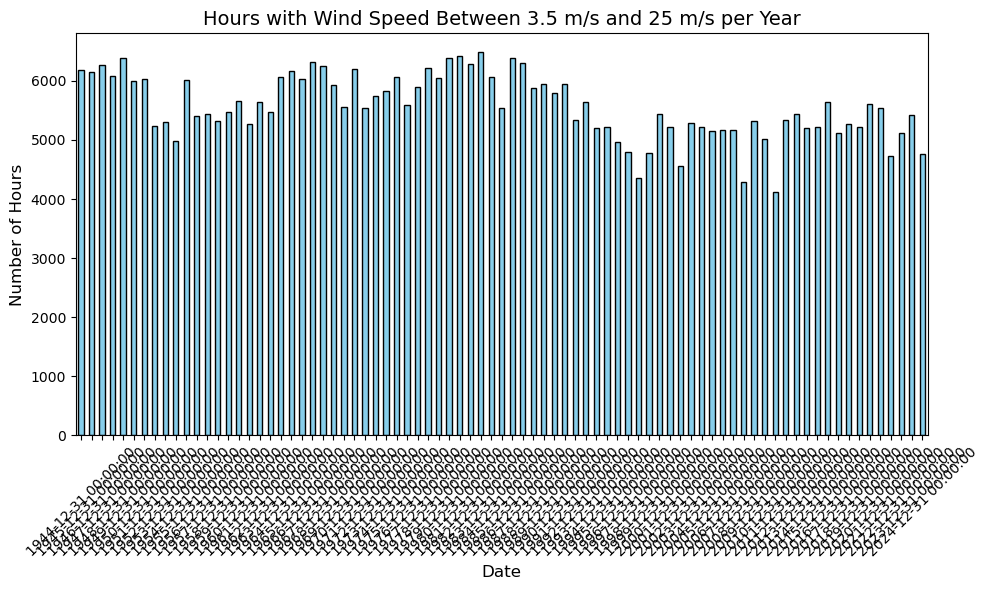

In [27]:
# Plot the data
plt.figure(figsize=(10, 6))  # Optional: specify the figure size
hours_per_year.plot(kind='bar', color='skyblue', edgecolor='black')  # Bar chart for daily hours

# Set the title and labels
plt.title('Hours with Wind Speed Between 3.5 m/s and 25 m/s per Year', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Hours', fontsize=12)

# Show the plot
plt.xticks(rotation=45)  # Optional: rotate x-axis labels for better readability
plt.tight_layout()  # Optional: adjust layout to make it look better
plt.show()


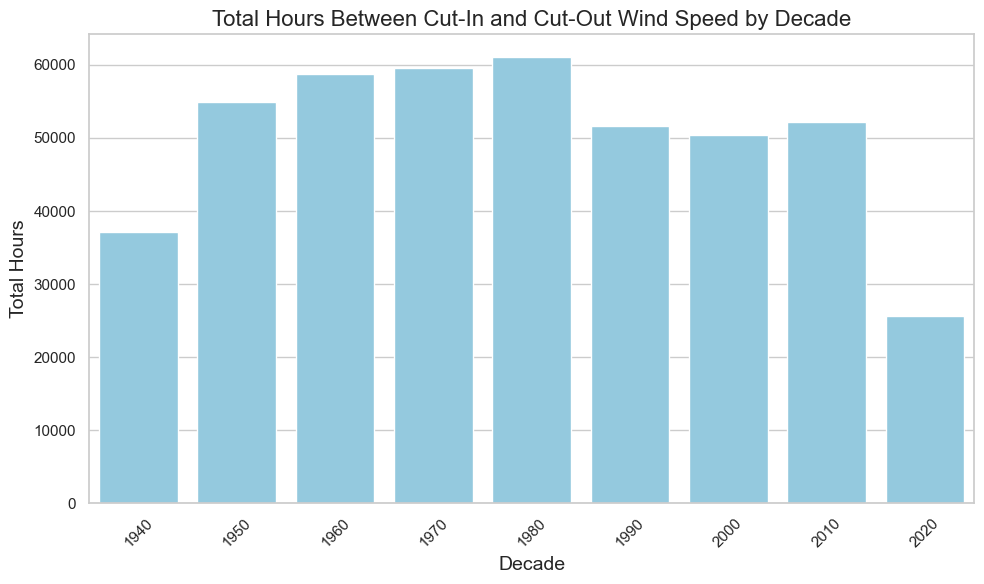

In [28]:
# Plot the data by decade using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=hours_per_decade.index, y=hours_per_decade.values, color='skyblue')

# Customize the plot with title and labels
plt.title('Total Hours Between Cut-In and Cut-Out Wind Speed by Decade', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Total Hours', fontsize=14)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [29]:
# Calculate total hours in a year (considering leap years, assuming 8760 or 8784 hours)
total_hours_in_year = 8760
    
    # Calculate the percentage of the year
percentage_of_year = ((hours_per_year / total_hours_in_year) * 100).round(1)
percentage_of_year

date
1944-12-31    70.5
1945-12-31    70.2
1946-12-31    71.6
1947-12-31    69.5
1948-12-31    73.0
              ... 
2020-12-31    63.3
2021-12-31    53.9
2022-12-31    58.5
2023-12-31    61.8
2024-12-31    54.4
Freq: YE-DEC, Length: 81, dtype: float64

Example Estimation:
If we assume:

Cut-in wind speed = 4 m/s
Cut-out wind speed = 25 m/s
Rated wind speed = 12 m/s
Capacity factor = 30% (a reasonable average for a good location)

In [ ]:
df_optimal_valentia = df_valentia[(df_valentia['wdsp_m/s'] >= 14) & (df_valentia['wdsp_m/s'] < 25)]
df_optimal_valentia

,rain,wetb,dewpt,rhum,wddir,wdsp_m/s,air_density
date,,,,,,,
1944-01-20 10:00:00,0.7,7.7,6.6,85.0,210.0,14.920000,1.252300
1944-01-21 18:00:00,1.0,8.3,7.7,92.0,220.0,15.950000,1.251436
1944-01-21 19:00:00,0.7,8.6,7.7,90.0,220.0,15.430000,1.247742
1944-01-21 20:00:00,0.1,8.8,7.7,92.0,220.0,14.400000,1.245805
1944-01-21 21:00:00,0.3,9.3,8.3,90.0,230.0,15.430000,1.241843
...,...,...,...,...,...,...,...
2024-10-20 12:00:00,0.0,10.9,7.3,62.0,220.0,17.490000,1.197932
2024-10-20 13:00:00,0.0,11.0,8.1,68.0,220.0,16.980000,1.200419
2024-10-20 14:00:00,0.1,11.2,9.2,76.0,230.0,16.459999,1.204689


In [31]:
best_hours_per_year = group_by_dataset(df_optimal_valentia, time='YE')
best_hours_per_year

date
1944-12-31     99
1945-12-31     81
1946-12-31     72
1947-12-31    148
1948-12-31    101
             ... 
2020-12-31     76
2021-12-31     38
2022-12-31     36
2023-12-31     23
2024-12-31     35
Freq: YE-DEC, Length: 81, dtype: int64

In [32]:
# Calculate the percentage of the year
best_percentage_of_year = (best_hours_per_year / total_hours_in_year) * 100
best_percentage_of_year

date
1944-12-31    1.130137
1945-12-31    0.924658
1946-12-31    0.821918
1947-12-31    1.689498
1948-12-31    1.152968
                ...   
2020-12-31    0.867580
2021-12-31    0.433790
2022-12-31    0.410959
2023-12-31    0.262557
2024-12-31    0.399543
Freq: YE-DEC, Length: 81, dtype: float64